In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import style
import matplotlib as mpl
%matplotlib inline

In [2]:
def dictToList(inputDict):
    outputDict = []
    for key, value in inputDict.iteritems():
        temp = value
        outputDict.append(temp)
    return outputDict
def crateLagList(input_list,cup_size):
    output_list = []
    for i in range(len(input_list)-cup_size+1):
        temp_list = []
        for j in range(cup_size):
            temp_list.append(input_list[j+i])
        output_list.append(temp_list)
    return output_list

In [3]:
link_timeline = "https://covid19.th-stat.com/api/open/timeline"

In [4]:
f = requests.get(link_timeline)
f_json = f.json()
df = pd.DataFrame.from_dict(f_json['Data'])

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

           Date  NewConfirmed  NewRecovered  NewHospitalized  NewDeaths  \
0    01/01/2020             0             0                0          0   
1    01/02/2020             0             0                0          0   
2    01/03/2020             0             0                0          0   
3    01/04/2020             0             0                0          0   
4    01/05/2020             0             0                0          0   
5    01/06/2020             0             0                0          0   
6    01/07/2020             0             0                0          0   
7    01/08/2020             0             0                0          0   
8    01/09/2020             0             0                0          0   
9    01/10/2020             0             0                0          0   
10   01/11/2020             0             0                0          0   
11   01/12/2020             1             0                1          0   
12   01/13/2020          

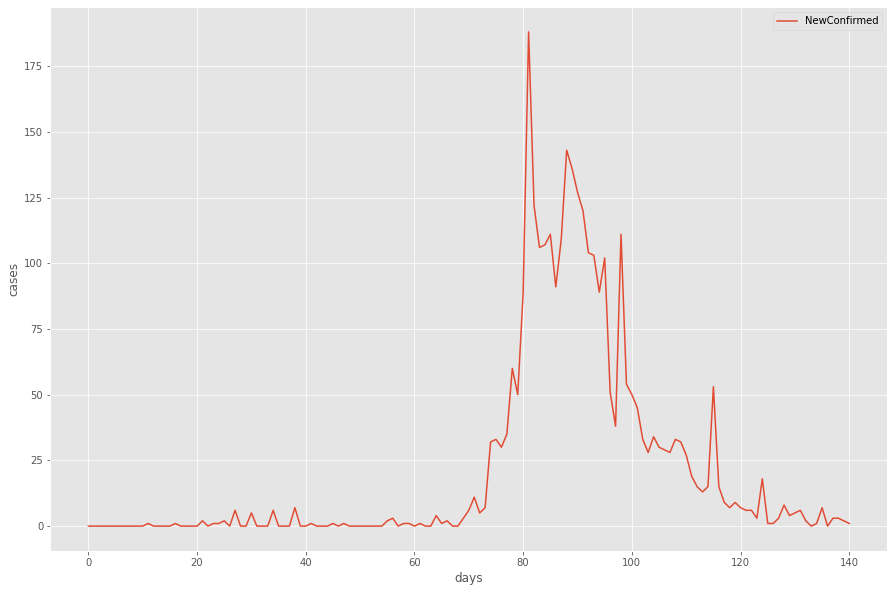

In [16]:
NewConfirmed = df["NewConfirmed"]
# Adjusting the size of matplotlib
mpl.rc('figure', figsize=(15, 10))
mpl.__version__
# Adjusting the style of matplotlib
style.use('ggplot')
plt.ylabel('cases')
plt.xlabel('days')
NewConfirmed.plot(label='NewConfirmed')
plt.legend()

In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [214]:
sample_size = 10
NewConfirmed.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.3 * len(NewConfirmed)))

Y_lately = dictToList(NewConfirmed[-forecast_out:])
Y_train = dictToList(NewConfirmed[:-forecast_out])
X_lately = crateLagList(Y_lately,sample_size)
X_lately = X_lately[:len(X_lately)-1]
X_train = crateLagList(Y_train,sample_size)
X_train = X_train[:len(X_train)-1]
Y_lately = Y_lately[sample_size:]
Y_train = Y_train[sample_size:]

clfknn = KNeighborsRegressor(n_neighbors=20)
clfknn.fit(X_train, Y_train)
confidenceknn = clfknn.score(X_lately, Y_lately)
print(confidenceknn)

0.4213637183239246


In [199]:
forecast_temp = clfknn.predict(X_lately)
forecast_set = []
for i in forecast_temp:
    forecast_set.append(math.ceil(i))
print(forecast_set)

[17, 17, 17, 17, 17, 12, 12, 9, 17, 11, 9, 6, 5, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2]


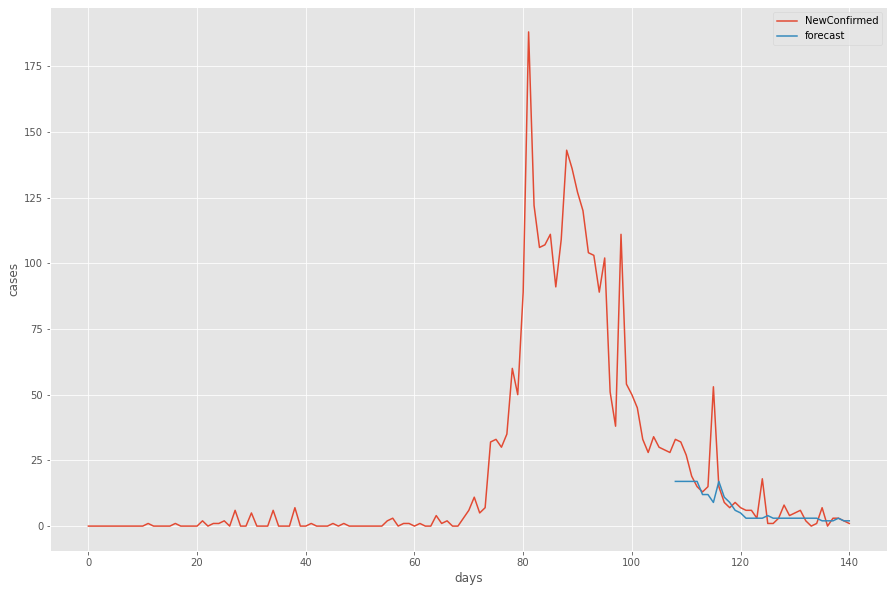

In [215]:
mpl.rc('figure', figsize=(15, 10))
mpl.__version__
# Adjusting the style of matplotlib
style.use('ggplot')
plt.ylabel('cases')
plt.xlabel('days')
NewConfirmed.plot(label='NewConfirmed')
pair = np.array(range(len(Y_train)+(sample_size)*2,len(Y_train)+(sample_size)*2+len(forecast_set)))
plt.plot(pair,forecast_set,label='forecast')
plt.legend()